## ng_boundaries_individual
The purpose of this notebook is to create a segmentation layer to be used in Neuroglancer that contains segment boundaries for each brain region. 

In [2]:
from cloudvolume import CloudVolume
import numpy as np
from scipy import ndimage, misc
import cv2
import matplotlib.pyplot as plt
import json
import tifffile
import edt
%matplotlib inline

## Seung lab Euclidian Distance Transform

### EDT on the Paxinos atlas

In [2]:
kimvol = CloudVolume('file:///home/ahoag/ngdemo/demo_bucket/atlas/kimatlas/',parallel=True)

In [3]:
kimdata = np.transpose(kimvol[:][...,0],(2,1,0))

Downloading: 100%|██████████| 95/95 [00:00<00:00, 642.84it/s]













In [13]:
segments = np.unique(kimdata)
segments = np.array(segments[segments!=0])

In [14]:
segments

array([    1,     2,     6, ..., 10734, 10735, 10737], dtype=uint16)

In [ ]:
# Need to make each segments' edt so I can figure out unique boundary

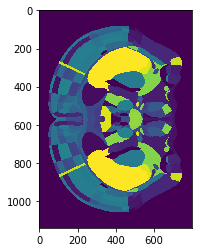

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(kimdata[:,50,:])

In [15]:
masked_plane = kimdata[:,50,:] == 23

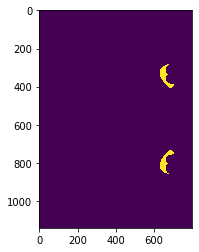

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(masked_plane)

In [18]:
dt_kimdata = edt.edt(
          kimdata, anisotropy=(1,1,1), # keep it in pixel space for now 
          black_border=True, order='C',
          parallel=4 # number of threads, <= 0 sets to num cpu
        )

In [32]:
kimoutput_vol = np.zeros_like(kimdata)

for ii in list(range(kimdata.shape[1])):
    print(ii)
    s = kimdata[:,ii,:]
    dt_s = edt.edt(
          s, anisotropy=(1,1), # keep it in pixel space for now 
          black_border=True, order='C',
          parallel=4 # number of threads, <= 0 sets to num cpu
        )
    boundary_mask = (dt_s > 0) & (dt_s<2)
    for segment in segments:
        masked_s = (s == segment)
        segment_boundary_mask = masked_s & boundary_mask
        kimoutput_vol[:,ii,:][segment_boundary_mask] = segment

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


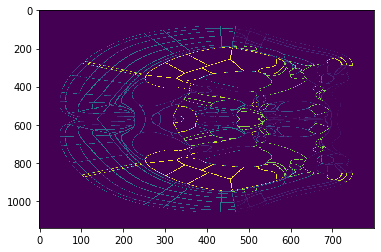

In [33]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(kimoutput_vol[:,50,:],aspect='auto')

In [36]:
# Looks awesome, let's save it
tifffile.imsave('/home/ahoag/ngdemo/data/Chon_et_al/kimatlas_boundaries_indiv.tif',kimoutput_vol)

In [37]:
# Let's also do a thickness=2 one to see if it helps with the pixelization appearance at all
kimoutput_vol_thick2 = np.zeros_like(kimdata)

for ii in list(range(kimdata.shape[1])):
    print(ii)
    s = kimdata[:,ii,:]
    dt_s = edt.edt(
          s, anisotropy=(1,1), # keep it in pixel space for now 
          black_border=True, order='C',
          parallel=4 # number of threads, <= 0 sets to num cpu
        )
    boundary_mask = (dt_s > 0) & (dt_s<3)
    for segment in segments:
        masked_s = (s == segment)
        segment_boundary_mask = masked_s & boundary_mask
        kimoutput_vol_thick2[:,ii,:][segment_boundary_mask] = segment

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


In [38]:
# Save it
tifffile.imsave('/home/ahoag/ngdemo/data/Chon_et_al/kimatlas_boundaries_indiv_width2.tif',kimoutput_vol_thick2)

## Allen atlas

In [3]:
allenvol = CloudVolume('file:///home/ahoag/ngdemo/demo_bucket/atlas/allenatlas_2017_16bit_hierarch_labels_fillmissing/',parallel=True)
allendata = np.transpose(allenvol[:][...,0],(2,1,0))

Downloading: 100%|██████████| 38/38 [00:00<00:00, 279.31it/s]


Downloading: 100%|██████████| 38/38 [00:00<00:00, 286.54it/s]

Downloading: 100%|██████████| 38/38 [00:00<00:00, 254.98it/s]


In [4]:
allen_segments = np.array([x for x in np.unique(allendata) if x!=0])
allen_segments

array([   1,    8,    9,   20,   21,   22,   23,   24,   26,   27,   28,
         29,   30,   46,   47,   48,   49,   50,   51,   53,   54,   55,
         56,   57,   58,   67,   68,   69,   70,   71,   72,   74,   75,
         76,   77,   78,   79,   81,   82,   83,   84,   85,   86,   88,
         89,   90,   91,   92,   93,  101,  102,  104,  105,  106,  107,
        108,  109,  111,  112,  113,  114,  115,  116,  118,  119,  120,
        121,  122,  123,  126,  127,  128,  129,  130,  131,  140,  141,
        142,  143,  144,  145,  147,  148,  149,  150,  151,  152,  154,
        155,  156,  157,  158,  159,  168,  169,  170,  171,  172,  173,
        175,  176,  177,  178,  179,  180,  182,  183,  184,  185,  186,
        187,  189,  190,  191,  192,  193,  194,  196,  197,  198,  199,
        200,  201,  203,  204,  205,  206,  207,  208,  230,  231,  232,
        233,  234,  236,  237,  238,  239,  240,  242,  244,  245,  246,
        247,  249,  251,  252,  253,  254,  262,  2

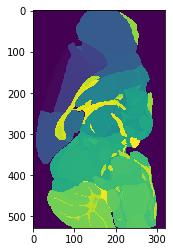

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(allendata[250])

In [71]:
# Do the 3D EDT for Allen since we will want to look at all slices
allenoutput_vol = np.zeros_like(allendata)

dt_allen = edt.edt(
      allendata, anisotropy=(1,1,1), # keep it in pixel space for now 
      black_border=True, order='C',
      parallel=4 # number of threads, <= 0 sets to num cpu
    )
allen_boundary_mask = (dt_allen > 0) & (dt_allen<3)
for ii,segment in enumerate(allen_segments):
    print(ii+1,len(segments))
    mask = (allendata == segment)
    segment_boundary_mask = mask & allen_boundary_mask
    allenoutput_vol[segment_boundary_mask] = segment

1 1127
2 1127
3 1127
4 1127
5 1127
6 1127
7 1127
8 1127
9 1127
10 1127
11 1127
12 1127
13 1127
14 1127
15 1127
16 1127
17 1127
18 1127
19 1127
20 1127
21 1127
22 1127
23 1127
24 1127
25 1127
26 1127
27 1127
28 1127
29 1127
30 1127
31 1127
32 1127
33 1127
34 1127
35 1127
36 1127
37 1127
38 1127
39 1127
40 1127
41 1127
42 1127
43 1127
44 1127
45 1127
46 1127
47 1127
48 1127
49 1127
50 1127
51 1127
52 1127
53 1127
54 1127
55 1127
56 1127
57 1127
58 1127
59 1127
60 1127
61 1127
62 1127
63 1127
64 1127
65 1127
66 1127
67 1127
68 1127
69 1127
70 1127
71 1127
72 1127
73 1127
74 1127
75 1127
76 1127
77 1127
78 1127
79 1127
80 1127
81 1127
82 1127
83 1127
84 1127
85 1127
86 1127
87 1127
88 1127
89 1127
90 1127
91 1127
92 1127
93 1127
94 1127
95 1127
96 1127
97 1127
98 1127
99 1127
100 1127
101 1127
102 1127
103 1127
104 1127
105 1127
106 1127
107 1127
108 1127
109 1127
110 1127
111 1127
112 1127
113 1127
114 1127
115 1127
116 1127
117 1127
118 1127
119 1127
120 1127
121 1127
122 1127
123 1127
1

In [72]:
tifffile.imsave('/home/ahoag/ngdemo/data/allen_atlas/allenatlas_2017_16bit_hierarch_labels_fillmissing_boundaries_indiv.tif',allenoutput_vol)

In [61]:
# Turns out that the 3d EDT looks bad in all 3 cross sectional views. Want to make the cross sectional boundaries as their own files. 
# Let's try horizontal first. 

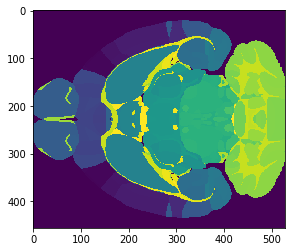

In [68]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(allendata[:,:,150])

In [74]:
allenoutput_horiz_vol = np.zeros_like(allendata)

for ii in list(range(allendata.shape[2])):
    print(ii)
    s = allendata[:,:,ii]
    dt_s = edt.edt(
          s, anisotropy=(1,1), # keep it in pixel space for now 
          black_border=True, order='C',
          parallel=4 # number of threads, <= 0 sets to num cpu
        )
    boundary_mask = (dt_s > 0) & (dt_s<2)
    for segment in allen_segments:
        masked_s = (s == segment)
        segment_boundary_mask = masked_s & boundary_mask
        allenoutput_horiz_vol[:,:,ii][segment_boundary_mask] = segment

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

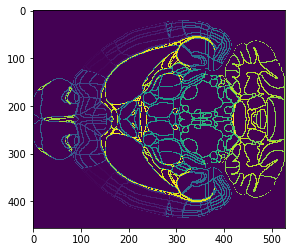

In [75]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(allenoutput_horiz_vol[:,:,150])

In [76]:
tifffile.imsave('/home/ahoag/ngdemo/data/allen_atlas/allenatlas_2017_16bit_hierarch_labels_fillmissing_boundaries_indiv_horiz.tif',allenoutput_horiz_vol)

In [77]:
456*528

240768

In [78]:
data_path = '/home/ahoag/ngdemo/data/allen_atlas/allenatlas_2017_16bit_hierarch_labels_fillmissing_boundaries_indiv_horiz.tif'
image = np.array(tifffile.imread(data_path),dtype=np.uint16, order='F')

In [79]:
image.shape

(456, 528, 320)

In [80]:
image[:,:,0].shape

(456, 528)

In [83]:
array = image[:,:,0].reshape((1,528,456)).T

In [84]:
array.shape

(456, 528, 1)